<a href="https://colab.research.google.com/github/MarwaRabia/Alemne/blob/master/Copy_of_Copy_of_Coding_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [ ]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression
# https://docs.google.com/presentation/d/e/2PACX-1vRK_dORAlLxlvo72NRIA43T-6FpZLvqwW1ZaB_CL1BFTeN-g7aOC4ACXqI0uQCMmyNG4DanqiVffNPR/pub?start=false&loop=false&delayms=3000

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/linear_regression


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [ ]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


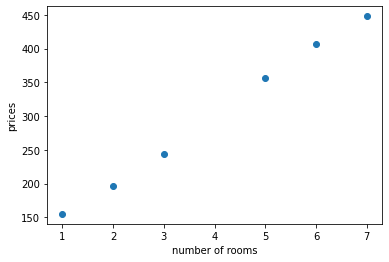

In [ ]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [ ]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    p_predicted=price_per_room*num_rooms+base_price
    price_per_room=price_per_room+learning_rate*num_rooms*(price-p_predicted)
    base_price=base_price+learning_rate*(price-p_predicted)

    return price_per_room, base_price

In [ ]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price
    
     p_predicted=price_per_room*num_rooms+base_price
     if price > p_predicted: 
         price_per_room=price_per_room+learning_rate*num_rooms
         base_price=base_price+learning_rate
     else:
         price_per_room=price_per_room-learning_rate*num_rooms
         base_price=base_price-learning_rate



     return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 51.05347808556453
Base price: 99.0970202799414


(51.05347808556453, 99.0970202799414)

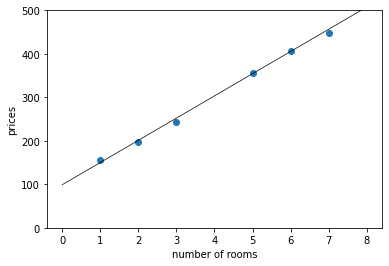

In [ ]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 10000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs 
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for i in range(epochs):
      x=random.randint(0,len(features)-1)
      # price_per_room, base_price=absolute_trick(base_price, price_per_room, features[x], labels[x], learning_rate)
      price_per_room, base_price=square_trick(base_price, price_per_room, features[x], labels[x], learning_rate)
 
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

Price per room: 50.80146197445225
Base price: 100.0144049078708
50.80146197445225
100.0144049078708
[150.81586688 201.61732886 252.41879083 354.02171478 404.82317675
 455.62463873]


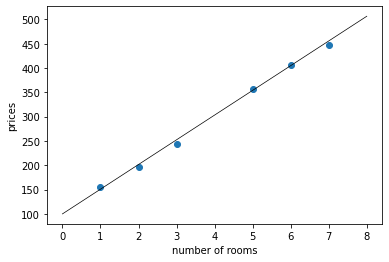

In [ ]:
price_per_room, base_price=linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)
print(price_per_room)
print(base_price)
p=base_price+features*price_per_room
print(p)

### Root mean squared error function

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    t=np.subtract(labels,predictions) 
    error=np.sqrt(np.sum(np.power((t),2))/(2*len(features)))
    
    

    return error

Price per room: 49.918195010555834
Base price: 99.77296636241151
3.770387026631325


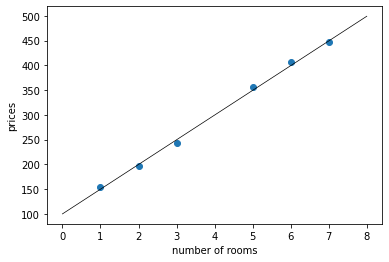

In [ ]:
price_per_room, base_price=linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)
# print(price_per_room)
# print(base_price)
p=base_price+features*price_per_room
# print(p)
print( rmse(labels, p))

### Plotting the error function

Price per room: 50.27433402531352
Base price: 98.99521898971031


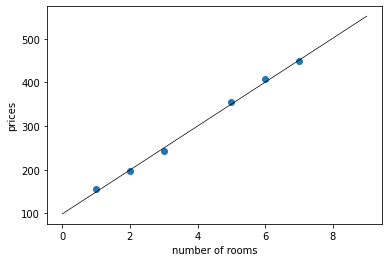

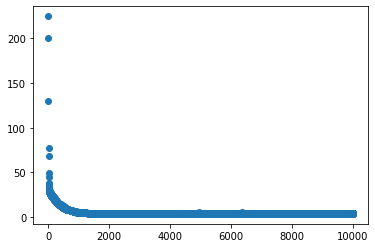

(50.27433402531352, 98.99521898971031)

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

**bold text**### Linear regression using sklearn



In [ ]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(features.reshape(-1, 1), labels)






In [ ]:
import re
## TODO ##
# print the coefficients and bias of this model
regr.coef_
regr.intercept_


99.59523809523819

In [ ]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
y_pred = regr.predict(np.array([4]).reshape(-1, 1))
y_pred



array([351.55952381])

### Normal Equation



In [ ]:
from numpy.linalg import inv

def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features
    X=np.array([np.ones(len(features)),features.flatten()]).T
    # w=inv((np.matmul(x_new.transpose,x_new)))
    # W=np.matmul(w,x_new.transpose)
    # W=np.matmul(w,labels)
    W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, labels))

    return W

W = Normal_Equation(features,labels)
print(W)
x_new=np.array([np.ones(len(features)),features.flatten()]).T
print(x_new)

[99.5952381  50.39285714]
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 5.]
 [1. 6.]
 [1. 7.]]
